In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
digit_mnist = keras.datasets.mnist

In [5]:
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


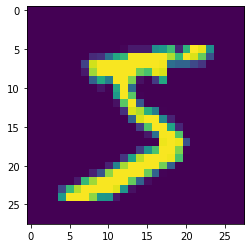

In [6]:
plt.imshow(X_train_full[0])

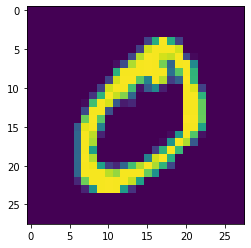

In [7]:
plt.imshow(X_train_full[1])

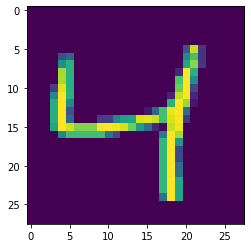

In [8]:
plt.imshow(X_train_full[2])

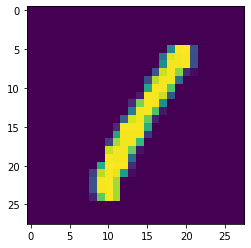

In [9]:
plt.imshow(X_train_full[3])

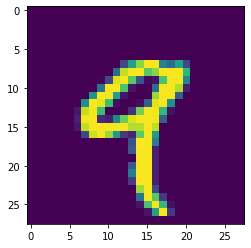

In [10]:
plt.imshow(X_train_full[4])

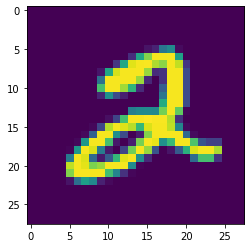

In [11]:
plt.imshow(X_train_full[5])

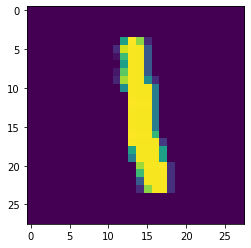

In [12]:
plt.imshow(X_train_full[6])

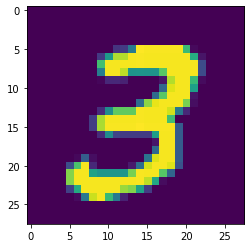

In [13]:
plt.imshow(X_train_full[7])

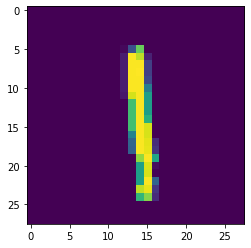

In [14]:
plt.imshow(X_train_full[8])

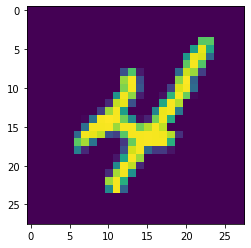

In [15]:
plt.imshow(X_train_full[9])

In [16]:
y_train_full[0]

5

In [17]:
y_train_full[3]

1

In [18]:
y_train_full[8]

1

In [19]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
y_train_full[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [21]:
y_train_full[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [22]:
X_train_n = X_train_full /255.
X_test_n = X_test/255.

In [23]:
X_valid, X_train= X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


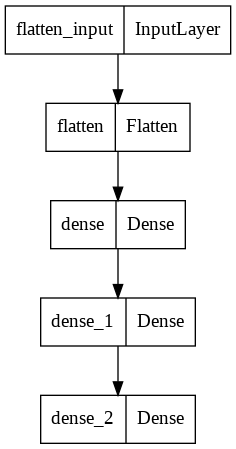

In [27]:
import pydot
keras.utils.plot_model(model)

In [28]:
weights, biases=model.layers[1].get_weights()

In [29]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [30]:
weights.shape

(784, 200)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
biases.shape

(200,)

In [33]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [34]:
model_history=model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9383
Epoch 4/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9443
Epoch 5/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1637 - val_accuracy: 0.9520
Epoch 7/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1482 - val_accuracy:

In [35]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [36]:
model_history.history

{'loss': [0.6606810092926025,
  0.30064913630485535,
  0.24879756569862366,
  0.21510721743106842,
  0.18927665054798126,
  0.16898876428604126,
  0.15212205052375793,
  0.13781794905662537,
  0.12603484094142914,
  0.11574254930019379,
  0.10665066540241241,
  0.09910834580659866,
  0.0917723998427391,
  0.0857086256146431,
  0.08019549399614334,
  0.07517477869987488,
  0.07070139050483704,
  0.06594450771808624,
  0.0624673031270504,
  0.05877825617790222,
  0.05554293841123581,
  0.052506979554891586,
  0.04958159849047661,
  0.04681731387972832,
  0.04429670423269272,
  0.04204839840531349,
  0.03982879966497421,
  0.03779636695981026,
  0.03578488156199455,
  0.033870596438646317,
  0.03218820318579674,
  0.030392780900001526,
  0.0289610642939806,
  0.02739945985376835,
  0.02600710280239582,
  0.024641359224915504,
  0.023685619235038757,
  0.02230927161872387,
  0.02118414081633091,
  0.020205099135637283,
  0.01913050375878811,
  0.01827135495841503,
  0.017407504841685295,
 

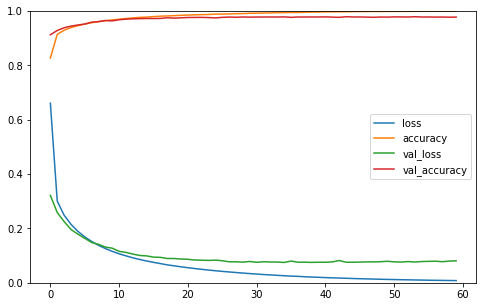

In [37]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid= True
plt.gca().set_ylim(0,1)
plt.show()

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9793


[0.07420483231544495, 0.9793000221252441]

In [39]:
X_new=X_test[:5]

In [40]:
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 75ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(54,36;334.8x217.44)


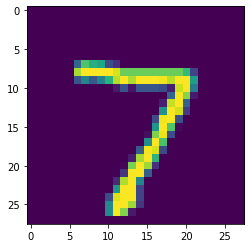

In [41]:
print(plt.imshow(X_test[0]))

In [42]:
y_test[0]

7

AxesImage(54,36;334.8x217.44)


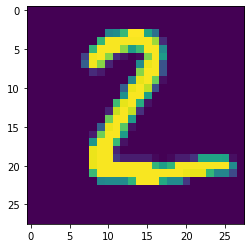

In [43]:
print(plt.imshow(X_test[1]))

In [44]:
y_test[1]

2

AxesImage(54,36;334.8x217.44)


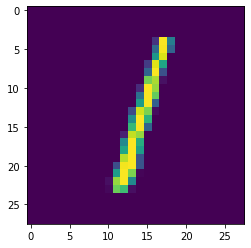

In [45]:
print(plt.imshow(X_test[2]))

In [46]:
y_test[2]

1

AxesImage(54,36;334.8x217.44)


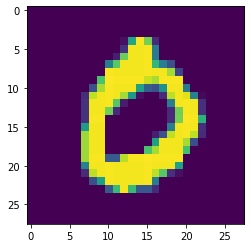

In [47]:
print(plt.imshow(X_test[3]))

In [48]:
y_test[3]

0

AxesImage(54,36;334.8x217.44)


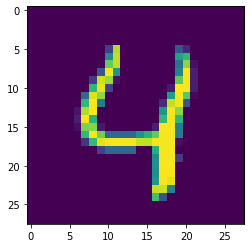

In [49]:
print(plt.imshow(X_test[4]))

In [50]:
y_test[4]

4

In [ ]:
# It seems that at last we are just printing X_test and y_test but before that (at line -40) we have done prediction and rounded it to 2 decimal places . Ther an array is present
# see  the value of 1 from the array and check it with the final X_test and y_test values. It is actual proof of correctness.